In [13]:
!pip install tensorflow

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [64]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Creating the list of classes in the same order as the CIFAR dataset

In [66]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

# 50000 images in the training set, 32x32 pixels and 3 RGB channels

(50000, 32, 32, 3)

In [31]:
X_test.shape

# 10000 images in the testing set, 32x32 pixels and 3 RGB channels

(10000, 32, 32, 3)

In [60]:
y_train.shape

(50000, 1)

In [62]:
y_train[:5]

# Array with the different classes, showing what class the image at that index belongs to. 
# For instance, the image at x-index 0 is a frog, and the corresponding index of that class is 6 as seen in the list 'classes'
# However, 2D array not needed in our case, therefore reshaped in the next code box

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [75]:
y_train = y_train.reshape(-1,)
y_train[:5]



array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
X_train[0]

# Data for the first image of the 10000 in array format

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

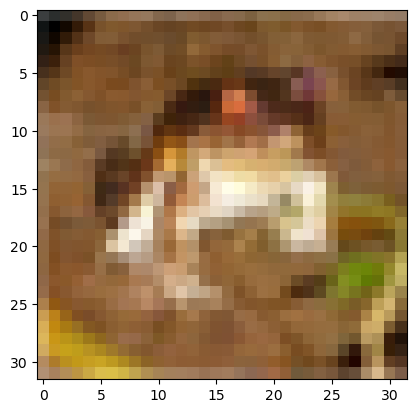

In [53]:
plt.imshow(X_train[0])

# Image of the froggo displayed earlier as an array

In [77]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Label on the X-Axis will show which class the image belongs to

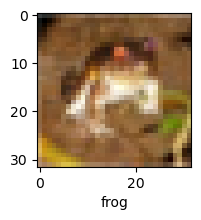

In [79]:
plot_sample(X_train, y_train, 0)

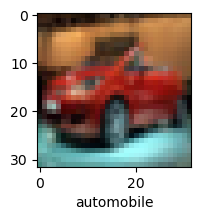

In [81]:
plot_sample(X_train, y_train, 45)

In [83]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Normalising the data to ensure all images have similar scales ; improves model performance in various areas

In [86]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # Input layer
        layers.Dense(3000, activation='relu'), # Deep layer 1, having 3000 neurons
        layers.Dense(1000, activation='relu'), # Deep layer 2, having 1000 neurons
        layers.Dense(10, activation='softmax') # 10 output nodes for the 10 classes  
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3013 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4188 - loss: 1.6446
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4532 - loss: 1.5515
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4730 - loss: 1.4877
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4923 - loss: 1.4360


You can see that Accuracy for ANN, not CNN is around 50% in the training data

In [89]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.44      0.53      1000
           1       0.65      0.61      0.63      1000
           2       0.49      0.16      0.25      1000
           3       0.26      0.57      0.36      1000
           4       0.57      0.24      0.34      1000
           5       0.33      0.42      0.37      1000
           6       0.50      0.57      0.53      1000
           7       0.52      0.54      0.53      1000
           8       0.51      0.72      0.60      1000
           9       0.67      0.41      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



In [100]:
cnn = models.Sequential([
    
    # First Convolutional Layer
    layers.Conv2D(
        filters=32,             # Number of filters (32 different convolutional kernels applied to input)
        kernel_size=(3, 3),     # Size of each filter (3x3 pixels)
        activation='relu',      # ReLU activation function to introduce non-linearity
        input_shape=(32, 32, 3) # Input shape (32x32 pixels, 3 color channels for RGB)
    ),
    
    # First Max Pooling Layer
    layers.MaxPooling2D(
        pool_size=(2, 2)        # Downsamples feature maps using a 2x2 window (reduces spatial size by half)
    ),
    
    # Second Convolutional Layer
    layers.Conv2D(
        filters=64,             # Increased number of filters (64) to capture more complex features
        kernel_size=(3, 3),     # Again, using a 3x3 kernel size
        activation='relu'       # ReLU to retain positive values and introduce non-linearity
    ),
    
    # Second Max Pooling Layer
    layers.MaxPooling2D(
        pool_size=(2, 2)        # Again, reduces spatial dimensions by half
    ),
    
    # Flatten Layer
    layers.Flatten(),           # Converts 2D feature maps into a 1D vector for input into dense layers
    
    # Fully Connected (Dense) Layer
    layers.Dense(
        units=64,               # 64 neurons to learn high-level patterns in the image
        activation='relu'       # ReLU for non-linearity and to prevent vanishing gradient problems
    ),
    
    # Output Layer
    layers.Dense(
        units=10,               # 10 neurons (one per class)
        activation='softmax'     # Softmax activation to output class probabilities (for multi-class classification)
    )
])


In [102]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3780 - loss: 1.7002
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5966 - loss: 1.1506
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6489 - loss: 1.0129
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6817 - loss: 0.9135
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7033 - loss: 0.8528
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7289 - loss: 0.7857
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7418 - loss: 0.7463
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7550 - loss: 0.7048
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7677 - loss: 0.6639
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7808 - loss: 0.6300


In [106]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.86      0.80      0.83      1000
           2       0.65      0.56      0.60      1000
           3       0.50      0.52      0.51      1000
           4       0.71      0.60      0.65      1000
           5       0.57      0.67      0.62      1000
           6       0.76      0.79      0.77      1000
           7       0.74      0.74      0.74      1000
           8       0.79      0.85      0.82      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

